In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import operator
from functools import reduce

In [80]:
# Reading the csv file into a dataframe
df = pd.read_csv("60Activities-poseData.csv")

In [81]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle
0,angled leg presses,"[0.6244075298309326, 0.6202492713928223, 0.625...","[0.6125868558883667, 0.6116636991500854, 0.614...","[-0.7317232489585876, -0.7084757089614868, -0....","[0.7274216413497925, 0.7407364845275879, 0.745...","[0.5923414826393127, 0.607475757598877, 0.6018...","[-0.2771779000759125, -0.31190672516822815, -0...","[0.45598286390304565, 0.4522373676300049, 0.45...","[0.7025633454322815, 0.7008029818534851, 0.700...","[-0.8455376625061035, -0.7739219665527344, -0....",...,"[-0.18987344205379486, -0.0501105897128582, -0...","[0.3456818461418152, 0.35185500979423523, 0.37...","[0.4793410003185272, 0.48256415128707886, 0.48...","[0.25488728284835815, 0.33376675844192505, 0.3...","[0.06234923005104065, 0.05919414758682251, 0.0...","[0.36329522728919983, 0.3608418405056, 0.36984...","[-0.06779885292053223, 0.08755621314048767, 0....","[0.24116382002830505, 0.23082193732261658, 0.2...","[0.3432755172252655, 0.34823083877563477, 0.34...","[0.41889476776123047, 0.49117857217788696, 0.4..."
1,arnold press,"[0.6750805377960205, 0.6730958819389343, 0.674...","[0.3685726225376129, 0.36425328254699707, 0.36...","[-0.023685937747359276, -0.028867069631814957,...","[0.47216328978538513, 0.47299060225486755, 0.4...","[0.3719647526741028, 0.368996262550354, 0.3686...","[-0.08193735778331757, -0.10326733440160751, -...","[0.6953715085983276, 0.6981197595596313, 0.706...","[0.4491013288497925, 0.44966304302215576, 0.45...","[-0.3566053807735443, -0.35106605291366577, -0...",...,"[-0.6593864560127258, -0.6449337601661682, -0....","[0.48968997597694397, 0.48874959349632263, 0.4...","[0.6085264682769775, 0.6103435158729553, 0.610...","[-0.8127835988998413, -0.8063545227050781, -0....","[0.7018957734107971, 0.7013241052627563, 0.701...","[0.742508590221405, 0.7433649301528931, 0.7421...","[-0.3053855001926422, -0.27191391587257385, -0...","[0.48945480585098267, 0.48833632469177246, 0.4...","[0.7392826080322266, 0.739270806312561, 0.7423...","[-0.3828478753566742, -0.3595616817474365, -0...."
2,back extensions,"[0.24804607033729553, 0.26040884852409363, 0.2...","[0.4517459571361542, 0.45352500677108765, 0.45...","[-0.3853210508823395, -0.37524843215942383, -0...","[0.23037508130073547, 0.23251590132713318, 0.2...","[0.4661741554737091, 0.46856704354286194, 0.47...","[0.28441742062568665, 0.28328651189804077, 0.2...","[0.37875789403915405, 0.3819432854652405, 0.38...","[0.4680253565311432, 0.4703821539878845, 0.469...","[-0.6757698059082031, -0.6794125437736511, -0....",...,"[-0.2013997733592987, -0.18110059201717377, -0...","[0.6978815793991089, 0.7043741941452026, 0.700...","[0.6545929908752441, 0.6574983596801758, 0.661...","[0.45003992319107056, 0.41382306814193726, 0.4...","[0.9378144145011902, 0.9393232464790344, 0.940...","[0.7470904588699341, 0.743262529373169, 0.7441...","[-0.1447303295135498, -0.076068215072155, -0.0...","[0.8562198877334595, 0.8520399332046509, 0.866...","[0.7071706056594849, 0.7047874331474304, 0.709...","[0.7344235777854919, 0.7165142893791199, 0.722..."
3,back presses,"[0.5400533080101013, 0.5398567914962769, 0.539...","[0.30235743522644043, 0.3022450804710388, 0.30...","[0.18136030435562134, 0.18636830151081085, 0.1...","[0.4811861217021942, 0.48017001152038574, 0.47...","[0.3090822100639343, 0.30989527702331543, 0.30...","[-0.02199406921863556, -0.012855282053351402, ...","[0.5700136423110962, 0.5703814625740051, 0.570...","[0.24835893511772156, 0.24547149240970612, 0.2...","[0.2516632080078125, 0.24780821800231934, 0.26...",...,"[-0.11309728771448135, -0.12462121993303299, -...","[0.5247339606285095, 0.5247664451599121, 0.525...","[0.5397233366966248, 0.543906033039093, 0.5451...","[-0.4834393858909607, -0.48

In [88]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               60 non-null     object
 1   xX_left_shoulder   60 non-null     object
 2   yY_left_shoulder   60 non-null     object
 3   zZ_left_shoulder   60 non-null     object
 4   xX_right_shoulder  60 non-null     object
 5   yY_right_shoulder  60 non-null     object
 6   zZ_right_shoulder  60 non-null     object
 7   xX_left_elbow      60 non-null     object
 8   yY_left_elbow      60 non-null     object
 9   zZ_left_elbow      60 non-null     object
 10  xX_right_elbow     60 non-null     object
 11  yY_right_elbow     60 non-null     object
 12  zZ_right_elbow     60 non-null     object
 13  xX_left_wrist      60 non-null     object
 14  yY_left_wrist      60 non-null     object
 15  zZ_left_wrist      60 non-null     object
 16  xX_right_wrist     60 non-null     object
 17 

In [83]:
df.shape

(60, 37)

In [84]:
# Converting the string into a list
for i in df.columns.tolist()[1:]:
    split_str = [re.split(', |, |/[ |]', x.strip("[]")) for x in df[i].tolist()]
    convert= [[float(t) for t in l] for l in split_str]
    df[i]  = convert

In [127]:
exercise = 12

df["name"][exercise]

'brbell shrugs'

In [128]:
# Function to create the exercise animation
def gif(exercise): 
    
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection ="3d")
    
    def update(i):
        ax.clear()
        
        ax.plot(
    
            [-df['xX_left_wrist'][exercise][i], -df['xX_left_elbow'][exercise][i]], 
            [-df['yY_left_wrist'][exercise][i], -df['yY_left_elbow'][exercise][i]], 
            [-df['zZ_left_wrist'][exercise][i], -df['zZ_left_elbow'][exercise][i]], marker='o', color='green', linestyle='dashed')
            
        ax.plot(
            
            [-df['xX_left_elbow'][exercise][i], -df['xX_left_shoulder'][exercise][i]], 
            [-df['yY_left_elbow'][exercise][i], -df['yY_left_shoulder'][exercise][i]], 
            [-df['zZ_left_elbow'][exercise][i], -df['zZ_left_shoulder'][exercise][i]], marker='o',color='red', linestyle='dashed' )
        
        ax.plot(
    
            [-df['xX_right_wrist'][exercise][i], -df['xX_right_elbow'][exercise][i]], 
            [-df['yY_right_wrist'][exercise][i], -df['yY_right_elbow'][exercise][i]], 
            [-df['zZ_right_wrist'][exercise][i], -df['zZ_right_elbow'][exercise][i]], marker='o', color='green', linestyle='dashed')
        
        
        ax.plot(
            
            [-df['xX_right_elbow'][exercise][i], -df['xX_right_shoulder'][exercise][i]], 
            [-df['yY_right_elbow'][exercise][i], -df['yY_right_shoulder'][exercise][i]], 
            [-df['zZ_right_elbow'][exercise][i], -df['zZ_right_shoulder'][exercise][i]], marker='o',color='red', linestyle='dashed' )
        
    
        ax.plot(
            
            [-df['xX_left_shoulder'][exercise][i], -df['xX_right_shoulder'][exercise][i]], 
            [-df['yY_left_shoulder'][exercise][i], -df['yY_right_shoulder'][exercise][i]], 
            [-df['zZ_left_shoulder'][exercise][i], -df['zZ_right_shoulder'][exercise][i]], marker='o', color='y', linestyle='dashed' )
     
        ax.plot(
            
            [-df['xX_right_shoulder'][exercise][i], -df['xX_right_hip'][exercise][i]], 
            [-df['yY_right_shoulder'][exercise][i], -df['yY_right_hip'][exercise][i]], 
            [-df['zZ_right_shoulder'][exercise][i], -df['zZ_right_hip'][exercise][i]], marker='o', color='blue', linestyle='dashed' )
                   
    
        ax.plot(
            
            [-df['xX_left_shoulder'][exercise][i], -df['xX_left_hip'][exercise][i]], 
            [-df['yY_left_shoulder'][exercise][i], -df['yY_left_hip'][exercise][i]], 
            [-df['zZ_left_shoulder'][exercise][i], -df['zZ_left_hip'][exercise][i]], marker='o', color='blue', linestyle='dashed' )
    
    
        ax.plot(
            [-df['xX_left_hip'][exercise][i], -df['xX_right_hip'][exercise][i]], 
            [-df['yY_left_hip'][exercise][i], -df['yY_right_hip'][exercise][i]], 
            [-df['zZ_left_hip'][exercise][i], -df['zZ_right_hip'][exercise][i]], marker='o',color='m', linestyle='dashed' )
         
        ax.plot(
            [-df['xX_left_hip'][exercise][i], -df['xX_left_knee'][exercise][i]], 
            [-df['yY_left_hip'][exercise][i], -df['yY_left_knee'][exercise][i]], 
            [-df['zZ_left_hip'][exercise][i], -df['zZ_left_knee'][exercise][i]], marker='o',color='grey', linestyle='dashed' )
    
        ax.plot(
            [-df['xX_left_knee'][exercise][i], -df['xX_left_ankle'][exercise][i]], 
            [-df['yY_left_knee'][exercise][i], -df['yY_left_ankle'][exercise][i]], 
            [-df['zZ_left_knee'][exercise][i], -df['zZ_left_ankle'][exercise][i]], marker='o',color='black', linestyle='dashed' )
    
        ax.plot(
            [-df['xX_right_hip'][exercise][i], -df['xX_right_knee'][exercise][i]], 
            [-df['yY_right_hip'][exercise][i], -df['yY_right_knee'][exercise][i]], 
            [-df['zZ_right_hip'][exercise][i], -df['zZ_right_knee'][exercise][i]], marker='o',color='grey', linestyle='dashed' )
    
        ax.plot(
            [-df['xX_right_knee'][exercise][i], -df['xX_right_ankle'][exercise][i]], 
            [-df['yY_right_knee'][exercise][i], -df['yY_right_ankle'][exercise][i]], 
            [-df['zZ_right_knee'][exercise][i], -df['zZ_right_ankle'][exercise][i]], marker='o',color='black', linestyle='dashed' )
    
    frames = 50
    ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)
    
    
    ani.save(df["name"][exercise] + '.gif', writer='pillow')

/var/folders/mt/cfy92p893v7ck_jf76l95k340000gn/T/ipykernel_2736/1573319748.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


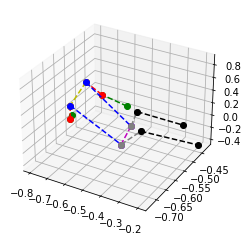

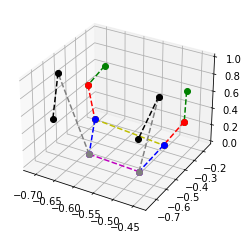

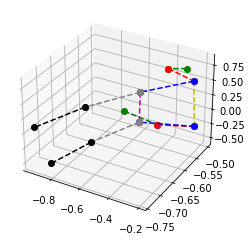

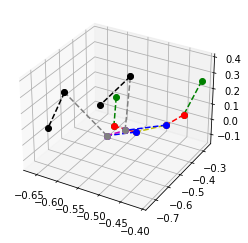

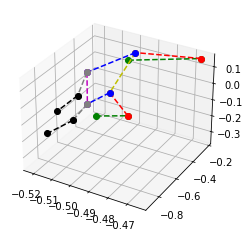

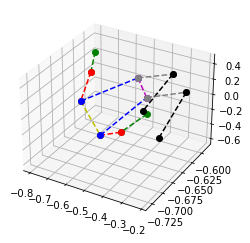

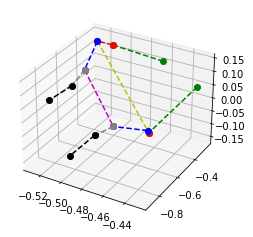

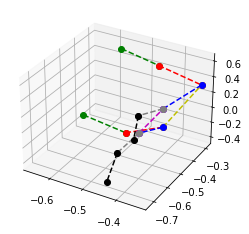

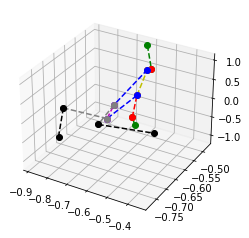

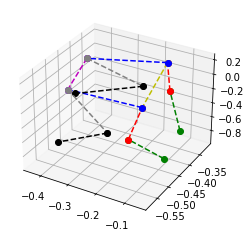

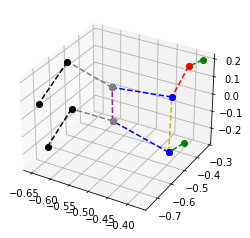

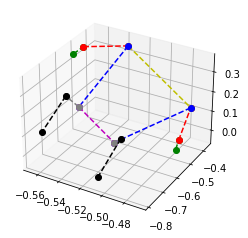

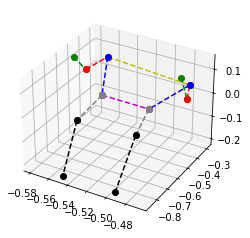

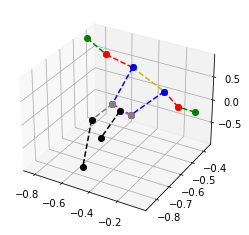

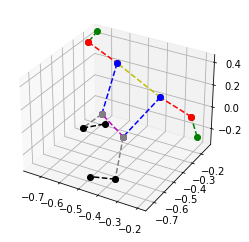

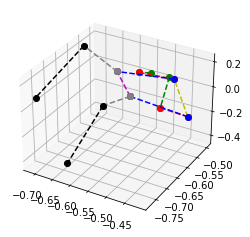

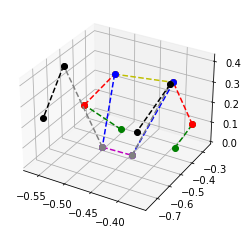

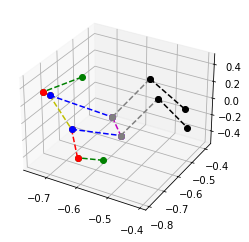

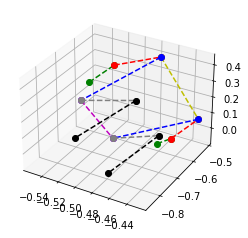

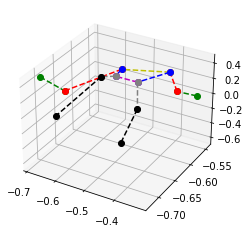

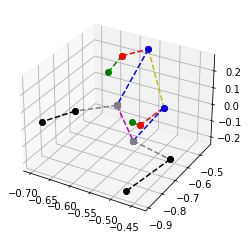

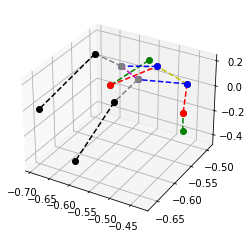

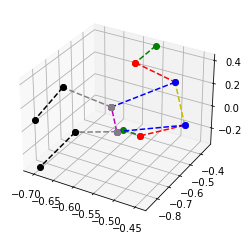

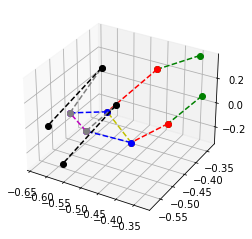

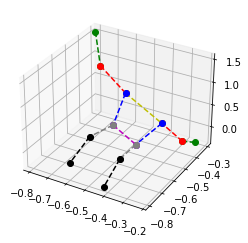

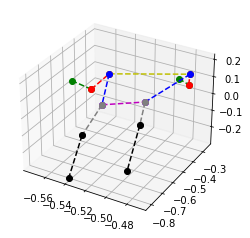

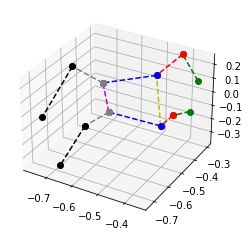

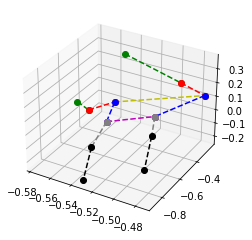

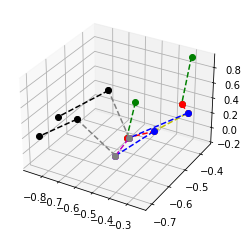

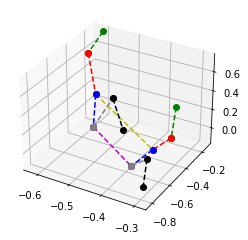

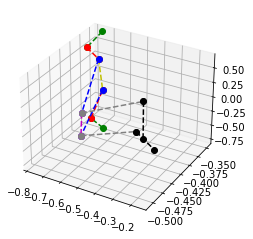

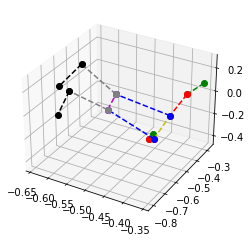

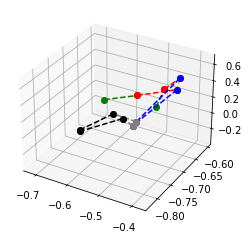

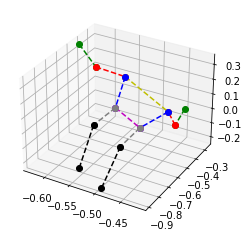

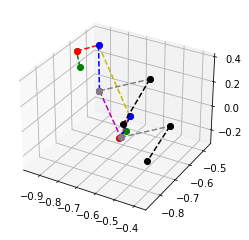

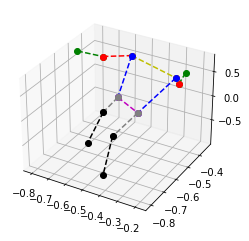

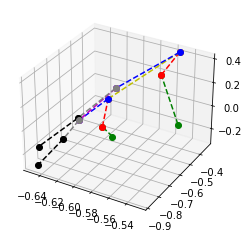

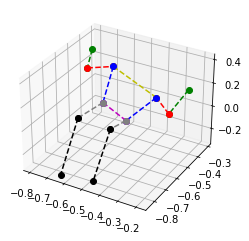

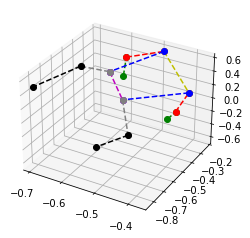

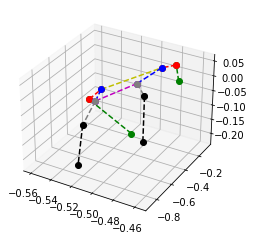

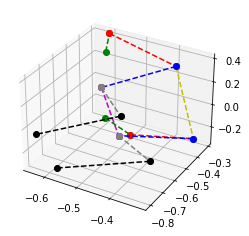

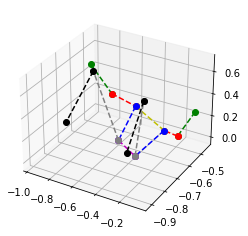

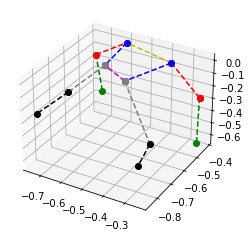

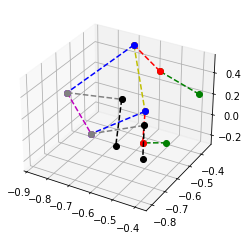

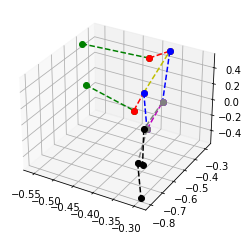

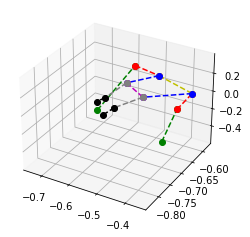

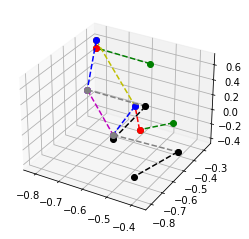

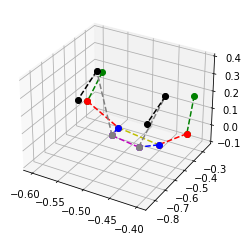

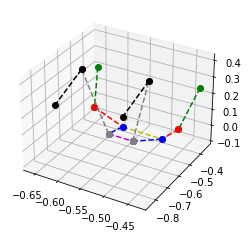

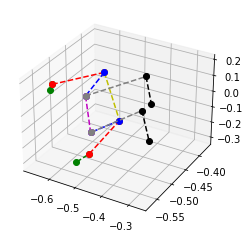

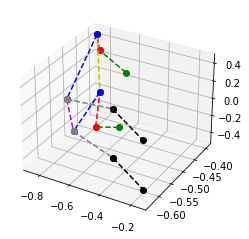

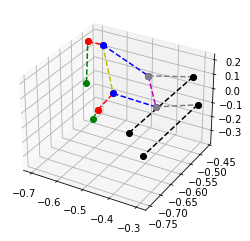

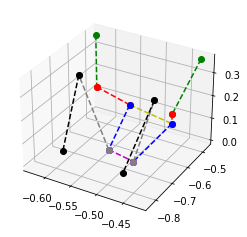

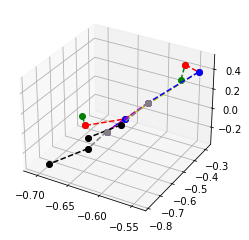

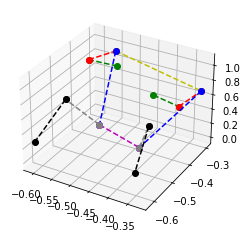

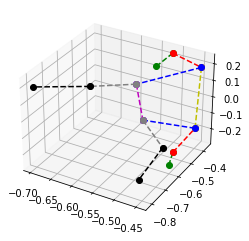

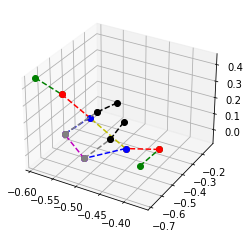

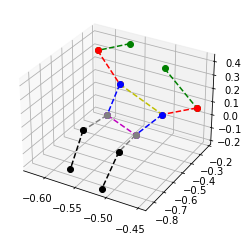

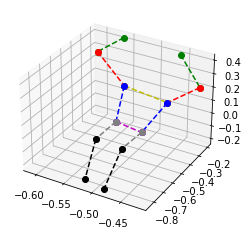

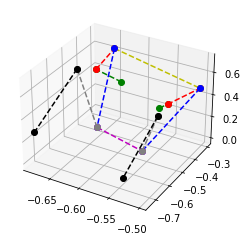

In [131]:
# Sample GIF
for i in range(len(df['name'])) :
    gif(i)